## The Great Lake Fishery Commision (GLFC) fish biomass data analysis 
 - **First update August, 2019**
 - **Last update October 02, 2019**

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 40)

##### Read the excel file "DataforGLFCKoopsProject.xlsx " that has multiple sheets

In [3]:
df_fish = pd.read_excel('DataforGLFCKoopsProject.xlsx', sheet_name='data')
print("The shape (number of rows and columns) of the dataframe: ", df_fish.shape)
print()
print("See first few rows of the dataframe:\n")
print(df_fish.head(3))

The shape (number of rows and columns) of the dataframe:  (36840, 8)

See first few rows of the dataframe:

   year  port  depth (m)  species     #/ha     g/ha      Lat     Long
0  1973   210         18      106  3079.45  9677.60  44.5177 -86.2595
1  1973   210         18      109   192.32  1258.37  44.5177 -86.2595
2  1973   210         18      127     0.00     0.00  44.5177 -86.2595


In [38]:
df_fish.head(3)

,year,port,depth (m),species,#/ha,g/ha,Lat,Long
0,1973,210,18,106,3079.45,9677.60,44.5177,-86.2595
1,1973,210,18,109,192.32,1258.37,44.5177,-86.2595
2,1973,210,18,127,0.00,0.00,44.5177,-86.2595


#### Check missing value (columnwise)

In [4]:
df_fish.isnull().sum()

year         0
port         0
depth (m)    0
species      0
#/ha         0
g/ha         0
Lat          0
Long         0
dtype: int64

#### Check the minimum and maximum of the sampling depth

In [5]:
print("Min. depth (m): ", df_fish['depth (m)'].min(), "and Max. depth (m): " , df_fish['depth (m)'].max())

Min. depth (m):  9 and Max. depth (m):  110


### Loading two other sheets: Specis and port names

In [6]:
df_specis_names = pd.read_excel('DataforGLFCKoopsProject.xlsx', sheet_name="readme", usecols="D:E", skiprows=0)
df_port_name    = pd.read_excel('DataforGLFCKoopsProject.xlsx', sheet_name="readme", usecols="A:B", skiprows=0)

In [8]:
print("Shape of the specis dataframe: ", df_specis_names.shape)
print()
print("Shape of the port dataframe: ", df_port_name.shape)
print()
print("Look first five rows the dataframes:\n")
print(df_specis_names.head())
print()
print(df_port_name.head())

Shape of the specis dataframe:  (12, 2)

Shape of the port dataframe:  (12, 2)

Look first five rows the dataframes:

   Species Code             Species Name
0            106                 Alewife
1            109           Rainbow Smelt
2            127                  Burbot
3            129  Threespine stickleback
4            130   Ninespine stickleback

   Port No            Port Name
0    210.0        Frankfort, MI
1    214.0        Ludington, MI
2    224.0        Saugatuck, MI
3    234.0         Waukegan, IL
4    240.0  Port Washington, WI


In [9]:
df_specis_names.columns

Index(['Species Code ', 'Species Name'], dtype='object')

### Merging 2 dataframes: df_fish and df_specis_names

In [10]:
df_merged = df_fish.merge(df_specis_names, how='inner', left_on='species', right_on='Species Code ')

In [11]:
print("Shape of the merged dataframe: ", df_merged.shape)
print()
print(df_merged.head())

Shape of the merged dataframe:  (36840, 10)

   year  port  depth (m)  species     #/ha       g/ha      Lat     Long  \
0  1973   210         18      106  3079.45    9677.60  44.5177 -86.2595   
1  1973   210         27      106   423.61   14230.06  44.5116 -86.2686   
2  1973   210         37      106   998.16   29252.19  44.4852 -86.2994   
3  1973   210         46      106  2862.63  113401.72  44.4838 -86.3097   
4  1973   210         55      106  3108.58  127663.44  44.4867 -86.3176   

   Species Code  Species Name  
0            106      Alewife  
1            106      Alewife  
2            106      Alewife  
3            106      Alewife  
4            106      Alewife  


#### convert unit of fish bimass from gram per hectre (g/ha) to kilgram per hectre (kg/ha). Rename the column heading also 

In [12]:
df_merged["g/ha"]=df_merged["g/ha"]/1000

df_merged.rename(columns={"g/ha":"kg/ha"},inplace=True)

In [13]:
df_merged.head(3)

,year,port,depth (m),species,#/ha,kg/ha,Lat,Long,Species Code,Species Name
0,1973,210,18,106,3079.45,9.67760,44.5177,-86.2595,106,Alewife
1,1973,210,27,106,423.61,14.23006,44.5116,-86.2686,106,Alewife
2,1973,210,37,106,998.16,29.25219,44.4852,-86.2994,106,Alewife


### Now merge port name with df_merged dataframe

In [14]:
df_merged_v1 = df_merged.merge(df_port_name, how='inner', left_on='port', right_on='Port No')

In [15]:
df_merged_v1.head()

,year,port,depth (m),species,#/ha,kg/ha,Lat,Long,Species Code,Species Name,Port No,Port Name
0,1973,210,18,106,3079.45,9.67760,44.5177,-86.2595,106,Alewife,210.0,"Frankfort, MI"
1,1973,210,27,106,423.61,14.23006,44.5116,-86.2686,106,Alewife,210.0,"Frankfort, MI"
2,1973,210,37,106,998.16,29.25219,44.4852,-86.2994,106,Alewife,210.0,"Frankfort, MI"
3,1973,210,46,106,2862.63,113.40172,44.4838,-86.3097,106,Alewife,210.0,"Frankfort, MI"
4,1973,210,55,106,3108.58,127.66344,44.4867,-86.3176,106,Alewife,210.0,"Frankfort, MI"


### drop two columns: 'Species Code ' and 'Port No'

In [16]:
df_merged_v2 = df_merged_v1.drop(columns=['Species Code ', 'Port No'])

In [17]:
df_merged_v2.head(3)

,year,port,depth (m),species,#/ha,kg/ha,Lat,Long,Species Name,Port Name
0,1973,210,18,106,3079.45,9.67760,44.5177,-86.2595,Alewife,"Frankfort, MI"
1,1973,210,27,106,423.61,14.23006,44.5116,-86.2686,Alewife,"Frankfort, MI"
2,1973,210,37,106,998.16,29.25219,44.4852,-86.2994,Alewife,"Frankfort, MI"


### save the merged file as a csv file 

In [18]:
df_merged_v2.to_csv("Merged_df.csv", index=False, index_label=False)

### See yearly patterns of nearshore and offshore fish biomass
- nearshore: depth is less than 30m
- offshore: depth is more than or equal to 30m

In [20]:
df_less_than_30m = df_merged_v2[df_merged_v2['depth (m)'] < 30]

In [21]:
df_greater_than_30m = df_merged_v2[df_merged_v2['depth (m)'] >=30]

### nearshore: gropuby year

In [22]:
grouped = df_less_than_30m.groupby(['year'])

In [23]:
# sns.set()
grouped['kg/ha'].sum(axis=1) # .head(30).plot(kind='bar', figsize=(20,6))

# plt.show()

year
1973     276.34043
1974     257.48101
1975     203.90504
1976      76.80130
1977      76.35374
1978     259.15772
1979     236.98272
1980     393.93548
1981     652.04423
1982     272.28059
1983     861.20451
1984     935.01871
1985     471.13379
1986    1190.32366
1987    1135.00743
1988    1520.90585
1989    1378.22345
1990     662.47891
1991     745.24295
1992     625.26513
1993     759.45078
1994     588.31834
1995     138.83016
1996     447.01308
1997    1004.15169
1999     437.18373
2000      57.88613
2001      69.10122
2002      19.49831
2003     136.40549
2004      53.41952
2005     208.24458
2006      60.73337
2007      45.56522
2008      99.57867
2009     185.88987
2010     201.03845
2011      56.06345
2012     111.82896
2013     472.98113
2014      52.88694
2015      16.11066
2016      42.17399
2017      46.13770
2018     122.36993
Name: kg/ha, dtype: float64

### save this data 

In [24]:
series_yearwise_fish= grouped['kg/ha'].sum(axis=1)

In [25]:
series_yearwise_fish.to_csv('Year_Wise_All_Fish.csv', header=True)

### plot year-wise nearshore total fish biomass

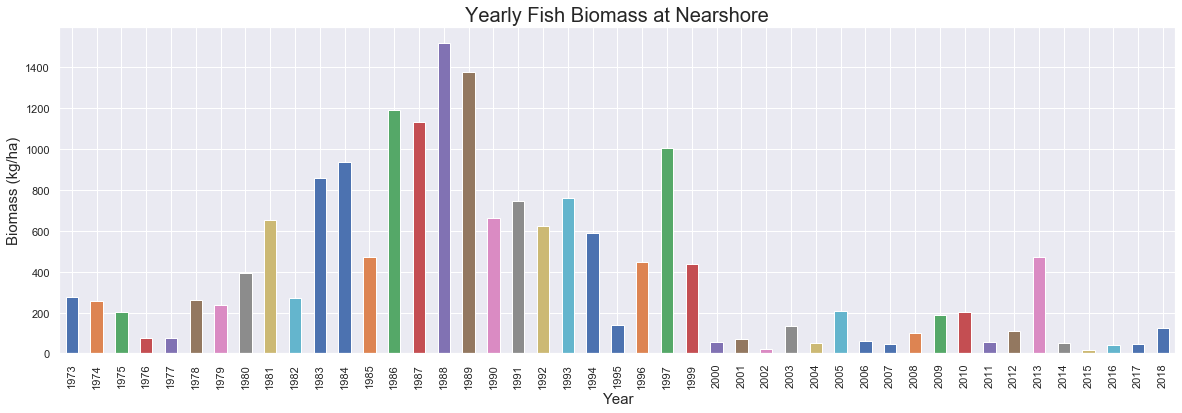

In [32]:
sns.set()
grouped['kg/ha'].sum(axis=1).head(50).plot(kind='bar', figsize=(20,6))
plt.xlabel('Year', fontsize=15)
plt.ylabel('Biomass (kg/ha)', fontsize=15)
plt.title('Yearly Fish Biomass at Nearshore', fontsize=20)
plt.show()

In [27]:
grouped_g = df_greater_than_30m.groupby(['year'])

In [28]:
grouped_g['kg/ha'].sum(axis=1)

year
1973    2270.54158
1974    1609.79223
1975    2199.02230
1976    1173.04977
1977    1264.93715
1978    1994.30869
1979    2791.08337
1980    2552.21994
1981    3791.25150
1982    3013.92594
1983    4571.75225
1984    4218.45608
1985    5107.87462
1986    4242.06274
1987    5962.48358
1988    5640.04878
1989    7213.84926
1990    5788.28239
1991    5631.38149
1992    7135.84307
1993    5338.39951
1994    4623.34650
1995    3146.03360
1996    5293.39704
1997    4259.03442
1999    1886.06761
2000     640.37355
2001    1464.28389
2002    1767.69860
2003    1304.19404
2004     982.28617
2005    1066.06616
2006     807.16471
2007     427.61377
2008     368.75708
2009     360.72828
2010     450.35184
2011     355.00525
2012     141.96955
2013     130.06085
2014      37.66168
2015      49.75422
2016     197.37744
2017     257.39763
2018     348.89181
Name: kg/ha, dtype: float64

### save offshore yearwise total fish biomass

In [29]:
series_yearwise_fish_g= grouped_g['kg/ha'].sum(axis=1)

In [30]:
series_yearwise_fish_g.to_csv('Year_Wise_All_Fish_Offshore.csv', header=True)

### plot yearwise offshore total biomass

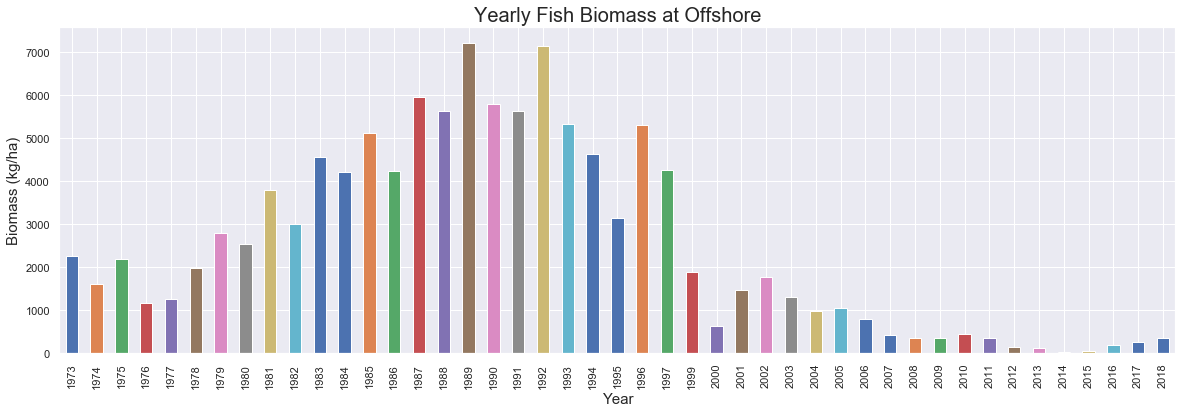

In [33]:
sns.set()
grouped_g['kg/ha'].sum(axis=1).head(50).plot(kind='bar', figsize=(20,6))
plt.xlabel('Year', fontsize=15)
plt.ylabel('Biomass (kg/ha)', fontsize=15)
plt.title('Yearly Fish Biomass at Offshore', fontsize=20)
plt.show()

### Nearshore: year and species wise total fish biomass

In [34]:
grouped_year_species = df_less_than_30m.groupby(['year', 'Species Name'])

In [35]:
series_year_species_wise_fish= grouped_year_species['kg/ha'].sum(axis=1)

In [36]:
series_year_species_wise_fish

year  Species Name          
1973  Alewife                   135.79110
      Bloater                     1.99304
      Burbot                      2.97819
      Deepwater sculpin           0.00000
      Lake trout                  1.17669
      Lake whitefish              0.00000
      Ninespine stickleback       0.09775
      Rainbow Smelt             128.23161
      Round goby                  0.00000
      Slimy sculpin               0.02477
      Threespine stickleback      0.00000
      Yellow perch                6.04728
1974  Alewife                   165.63417
      Bloater                     2.73609
      Burbot                      0.00000
      Deepwater sculpin           0.00000
      Lake trout                 11.11475
      Lake whitefish              0.26209
      Ninespine stickleback       0.16597
      Rainbow Smelt              71.90044
      Round goby                  0.00000
      Slimy sculpin               0.11491
      Threespine stickleback      0.00000
     

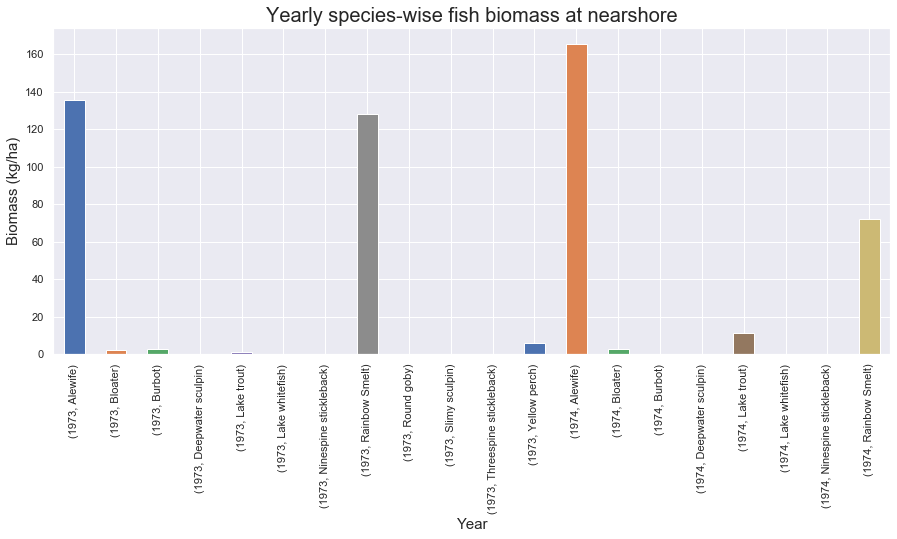

In [37]:
series_year_species_wise_fish.head(20).plot(kind='bar', figsize=(15,6))
plt.xlabel('Year', fontsize=15)
plt.ylabel('Biomass (kg/ha)', fontsize=15)
plt.title('Yearly species-wise fish biomass at nearshore', fontsize=20)
plt.show()

### Saving longitude, latitude to csv files for nearshore and offshore

In [ ]:
df_less_than_30m.columns

In [ ]:
df_lat_longitude_for_less_than_30 = df_less_than_30m[['Lat', 'Long']]

In [ ]:
df_lat_longitude_for_less_than_30.to_csv('LAT_LON_NEARSHORE.csv')

In [ ]:
df_lat_longitude_for_greater_than_30 = df_greater_than_30m[['Lat', 'Long']]

In [ ]:
df_lat_longitude_for_greater_than_30.to_csv('LAT_LON_OFFSHORE.csv')

In [ ]:
df_lat_longitude_for_greater_than_30.to_csv('LAT_LON_OFFSHORE.csv')